#Pytorch Workflow
Lets explore an end to end pytorch workflow
* https://www.learnpytorch.io/01_pytorch_workflow/


In [1]:
items = {1: "data(prep and load)",
         2: "buil;d model",
         3: "fitting the model",
         4: "making predictions/inference",
         5: "save model",
         6: "putting int all together"
         }

In [2]:
import torch
from torch import nn #nn has everythign for torch neural networks to be worked on
from  matplotlib import pyplot as plt

#check PyTorch version

torch.__version__

'2.3.0+cu121'

# 1. Preparing and loading data
Data can be almost anytnin g.
* spreadsheet,
* images,
* videos etc.
* DNA
* text etc.


machine learning is 2 part:
1. Get data into numerical representation
2. Build a model to learn those rep and patterns

lets create a data line using linear reg formula.
y  = b + xX

In [3]:
#create a set of known parameters
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

## Train validate and test datasets.
you use a set of the data to train and a set to  validate the dataset proiopr to testing and a new set to final test the datasets.
Note: you do not always need a validation set.
- 60-80 Train
- 10-20 Validation
- 10-20 Test

Lets do a 80-20 split



In [5]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


len(X_train),len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we visualize data?
What is our motto?
`vizualize, visualize, visualize`

In [8]:
def plot_prediction(train_data = X_train,
                    train_labels=y_train,
                    test_data = X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  #Plot training data
  plt.scatter(train_data, train_labels, c="b", s=4, label = "Training Data")

  #plot test data
  plt.scatter(test_data,test_labels,c="g", s=4, label="Testing Data")

  #Are there predisctions?
  if predictions is not None:
    #plot the prediuctions if they exist
    plt.scatter(test_data, predictions, c="r", label="Predictions")

  #show the legend
  plt.legend(prop={"size": 14});



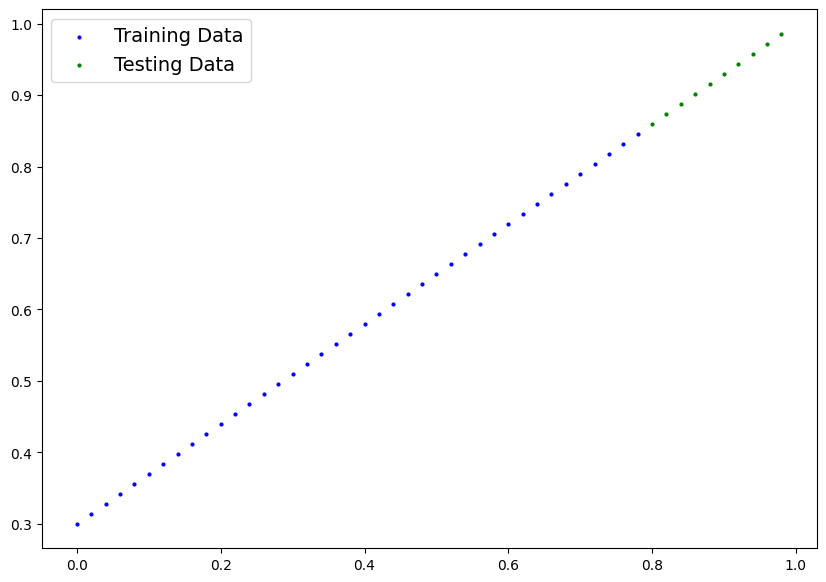

In [7]:
plot_prediction();

## Build our model
Our first PyTorch model

What our model does:
* start with random values (weight and bias)
* Look at training data and adjust the random values to etter represetn(or get closer to) the ideal values(the weight and bias we used to ccreate our training data)

How does it do so:
Through 2 main algorithms: **Gradient descent and backpropogation**


In [8]:
from torch import nn

#create linear regression model class
#almost everything in PyTorch inherits from nn.module
class LinearRegressionModel(nn.Module): #
  """
  Linear regression module
  """
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    #Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: #x is the input and returns a tensor
    return self.weights*x + self.bias

###PyTorch model building essentials

* torch.nn - contains all of the buildign blocks for computation grtaphs (another word for neural networks
* torch.nn.Parameter - what parameters should our model try and learn abnd oftern PyTorch will set
* torch.nn.Module - base class for all nn modules. if you subclass it, you should override forward
* torch.optim - this is where the optimisers live, they help in gradient descent
* def forward() - All nn.Module subclasses require you to override forward. this defined what happens in forward computation.

### Checking contents of tghe PyTorch model

Now that we have created a model let's see what is inside our model using `.parametrs`


In [58]:
#create a random seed
torch.manual_seed(42)

# create an instance of the mdoel
model_0 = LinearRegressionModel()

#check out the parametes
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [59]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### making prediction using `torch.inference_mode()`

To check our model's predictive power let's see how qwll it predicts `y_test` based on `X_test`

When we pass data through opur model it is going to run it through the `forward` method.

In [60]:
#make predictions with mdoel
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

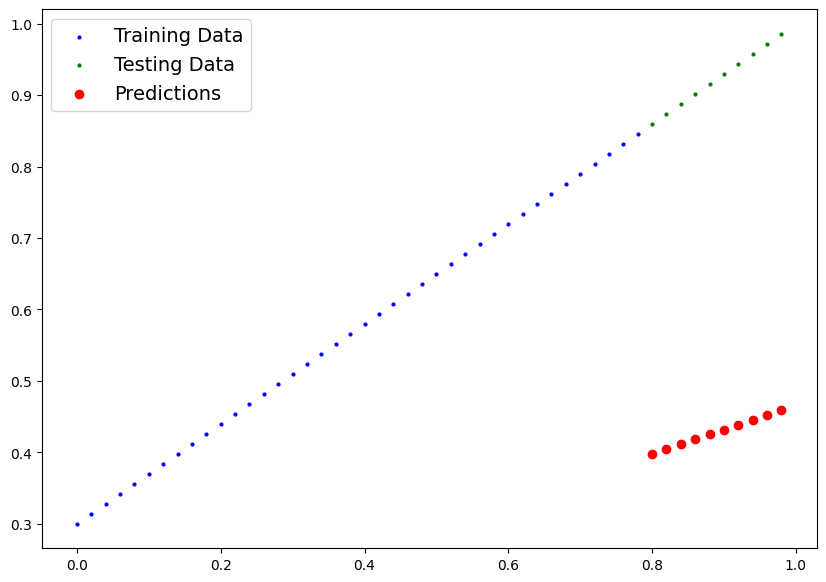

In [61]:
plot_prediction(predictions=y_preds)

##3. Train the model

Thd whole idea is for a model to mocve from some *unknown * paramers to some known parameters
O oin other words from a poop representation of th data to a better representation of the data,
One qay to measure how poor or how wrong our predictions are loss functions (criteria or a cost function)

Things we need to train:
*  **Loss function:** A function to measure how wrong how your model's prediction is function,. ex:
  - Regression prob: L1Loss and GSD optim
  - Classification prob: BCELoss
*  **Optimizer:** Take sinto account the loss of a model and adjusts the model's parameters (e.g.



In [62]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [63]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [64]:
#sert up aa loss funtion

loss_fn = nn.L1Loss()

#set up an optimiser (lets use stochastic gradient descenet -Random GD)
optimizer = torch.optim.SGD(model_0.parameters(),
                             lr=0.01)



### Building a training loop and testing loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves our data moving through our `forward()` functions.
2. Caculate the loss (compare forward pass predictions to ground truth labels
3. Optimize zero grad
4. Loss backward - move backward through the network to calculate the gradients of each of the parameters of opur model with respect to the loss. (**back prop**)
5. Optimizer step - Use the optimiser to adjust our model's paramets rto try and improve our loss (**gradient descent**)

"""
#Lets sing the PyTorch optimization song


]it is train time
do the forward pass
calculate the loss
optimizer zero grad
losses backwards
optimizer sytepstepstep


let's test now
with torch no grad
do the forward pass
calculate the lsos
watch it go down down down!
"""

In [65]:
torch.manual_seed(42)
# an epoch is one loop throught he data
epochs = 200


#Track the different values:
epoch_count = []
loss_values = []
test_losses_values = []

#0. Loop through the data

for epoch in range(epochs):
  #set training mode
  model_0.train() #sets all parameters to require gradients

  #1. FOrward pass
  y_pred = model_0(X_train)


  #2. Calculate the loss
  loss = loss_fn(y_pred,y_train)

  #3. optimiser zero grad
  optimizer.zero_grad()

  #4. Perform backpropogation on the loss with respect to the parameters of the model
  loss.backward()

  #5. Step the optimizer(perform gradient descent)
  optimizer.step()

  ### testing
  model_0.eval() # turns off some features that are not needed in testing mode. (dropout/batch norm)
  with torch.inference_mode(): #turns out few more mdoe like grads
    #still do the forward pass in
    test_pred = model_0(X_test)
    #2. calculate the test loss
    test_loss = loss_fn(test_pred, y_test)

  #Print out whats happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_losses_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | test loss:{test_loss} ")
    print(model_0.state_dict())







Epoch: 0 | Loss: 0.31288138031959534 | test loss:0.48106518387794495 
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | test loss:0.3463551998138428 
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | test loss:0.21729660034179688 
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | test loss:0.14464017748832703 
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | test loss:0.11360953003168106 
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | test loss:0.09919948130846024 
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | test loss:0.08886633068323135 
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [66]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

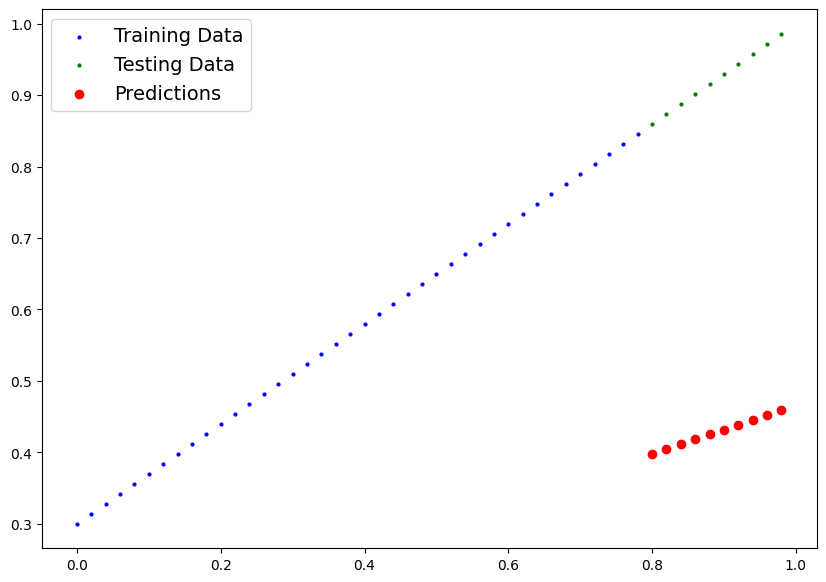

In [67]:
plot_prediction(predictions=y_preds)

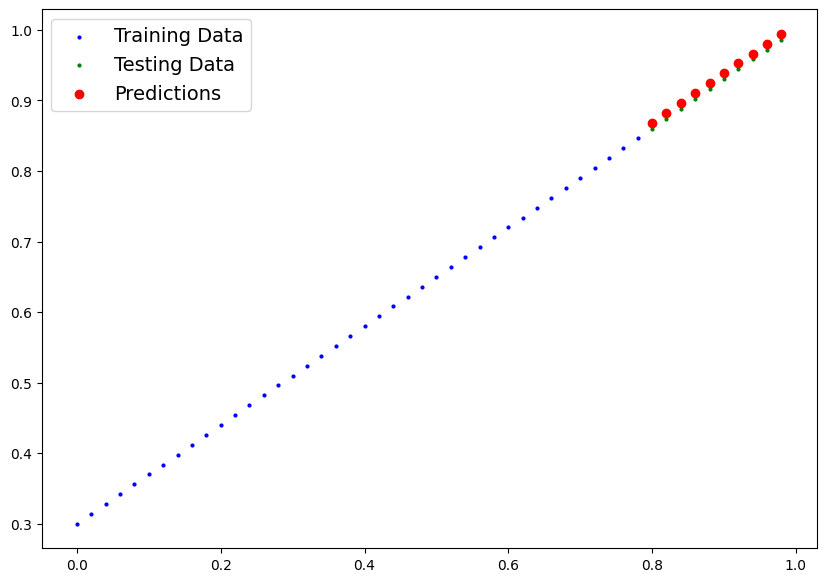

In [68]:
plot_prediction(predictions = y_preds_new)

In [69]:
epoch_count, loss_values, test_losses_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(

Text(0, 0.5, 'Training and test loss')

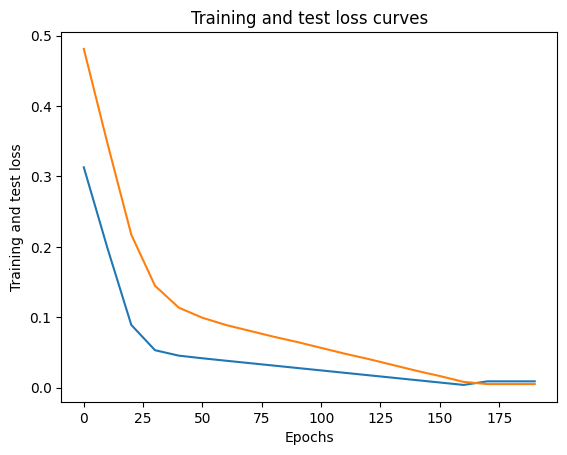

In [71]:
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor( loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count,  np.array(torch.tensor( test_losses_values).numpy()), label = "Test loss")
plt.title('Training and test loss curves')
plt.xlabel("Epochs")
plt.ylabel("Training and test loss")

## Saving a model in PyTorch


There are three main methods for saving and loading models in PyTorch.
1. `torch.save()` = allows to savwe in python pickle format
2. `torch.load()` - allos you to load a PtyTorch object
3. `torch.nn.Module.load_state_dict()` - allows to load a model's saved state dictionary

In [73]:
#saving our PyTorch model
from pathlib import Path
#1. create models directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. save the model's state_dict
print(f"Saving mopdel to {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Saving mopdel to models/01_pytorch_workflow_model_0.pth


In [78]:
ls  models

01_pytorch_workflow_model_0.pth


##Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model we will create a new instance of our model class and load the saved `state_dict()` into that


In [80]:
#Loading a PyTorch model

#let's instanctiate a new instance

loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [81]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [82]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [84]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

In [85]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all together
Lerts go back and put it all together again in one place

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#check version
torch.__version__

'2.3.0+cu121'

Create device agnostic code.

This means if we have a faster gpu available we can take use of tghat and potientallyu get our training model to run faster, If not code will default to cpu.

In [4]:
#set up device agnostic code.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device is: {device}")

device is: cpu


###6.1 Data

In [6]:
#create some data using linear regression formula y = wx + b

weight = 0.7
bias = 0.5

#create the range values
start = 0
end = 1
step = 0.02

#create X and y
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
#X[:10], y[:10]

train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

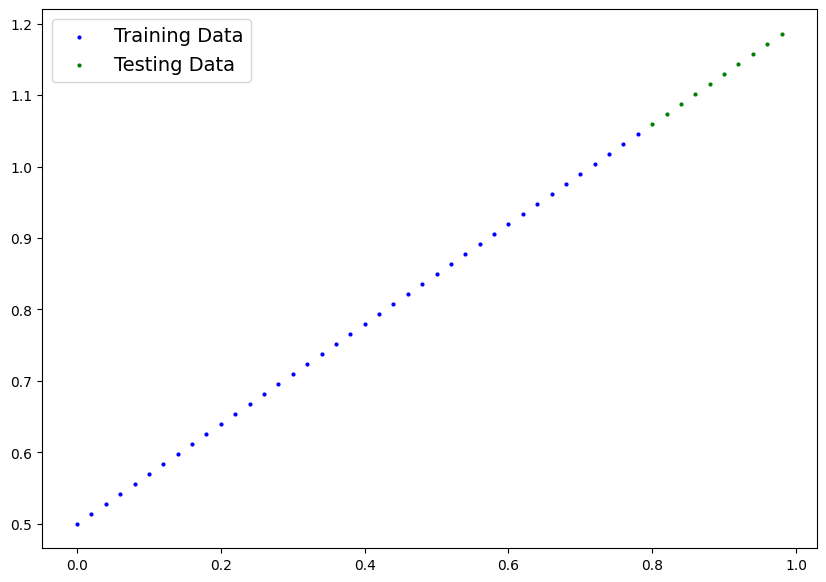

In [9]:
#Plot the data
plot_prediction(X_train, y_train, X_test, y_test)

###6.2 Build a PyTorch linear model

In [33]:
#create a linear model by subclassing nn module.


class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.Linear to build the layers for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1) #since there is 1 X value and 1 corresponding 1 value

  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

  #set manual seed
  torch.manual_seed(42)

  model_1 = LinearRegressionModelV2()
  model_1, model_1.state_dict()

In [34]:
next(model_1.parameters()).device
#set the model to use the target devide.
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

###6.3 Training

For training the model we need the following things


1.   loss Function
2.   Optimiser
3.   Training loop
4. Testing loop



In [35]:
#set up loss function
loss_fn = nn.L1Loss()

#optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

In [37]:
torch.manual_seed(42)

epochs = 200

#put the data to target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #1. foirward pass
  y_pred = model_1(X_train)

  #2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  #optimiser zero grad
  optimizer.zero_grad()

  #4.perform backprop
  loss.backward()

  #5. optimiser step
  optimizer.step()

  #Testing
  model_1.eval()
  with torch.inference_mode():
    test_preds = model_1(X_test)
    test_loss = loss_fn(test_preds, y_test)

  #Print what is happening
  if epoch % 10 == 0:
    print(f"Epochs: {epoch} | Training Loss: {loss} | Test Loss: {test_loss}")

Epochs: 0 | Training Loss: 0.00899285078048706 | Test Loss: 0.005138659384101629
Epochs: 10 | Training Loss: 0.00899285078048706 | Test Loss: 0.005138659384101629
Epochs: 20 | Training Loss: 0.00899285078048706 | Test Loss: 0.005138659384101629
Epochs: 30 | Training Loss: 0.00899285078048706 | Test Loss: 0.005138659384101629
Epochs: 40 | Training Loss: 0.00899285078048706 | Test Loss: 0.005138659384101629
Epochs: 50 | Training Loss: 0.00899285078048706 | Test Loss: 0.005138659384101629
Epochs: 60 | Training Loss: 0.00899285078048706 | Test Loss: 0.005138659384101629
Epochs: 70 | Training Loss: 0.00899285078048706 | Test Loss: 0.005138659384101629
Epochs: 80 | Training Loss: 0.00899285078048706 | Test Loss: 0.005138659384101629
Epochs: 90 | Training Loss: 0.00899285078048706 | Test Loss: 0.005138659384101629
Epochs: 100 | Training Loss: 0.00899285078048706 | Test Loss: 0.005138659384101629
Epochs: 110 | Training Loss: 0.00899285078048706 | Test Loss: 0.005138659384101629
Epochs: 120 | T

In [38]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6987]])),
             ('linear_layer.bias', tensor([0.5095]))])

###6.4 Making and evaluating predictions


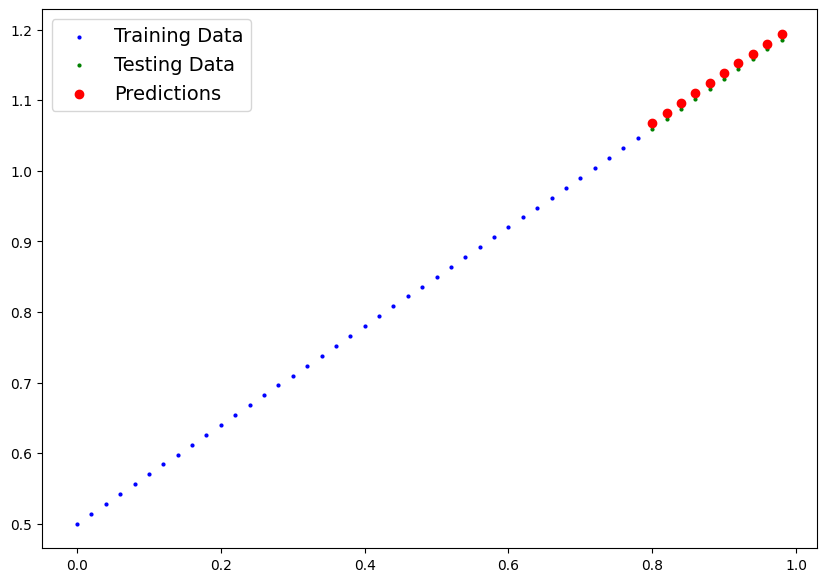

In [39]:
#turn into eval mode
model_1.eval()

#inf mode
with torch.inference_mode():
  y_preds = model_1(X_test)

#check out visually
plot_prediction(predictions=y_preds)

###6.5 Saving and loading a model


In [45]:
from pathlib import Path

FILE_PATH = Path("models")
FILE_PATH.mkdir(parents = True, exist_ok=True)

MODEL_NAME = "01_PyTorch_workflow_V2.pth"

MODEL_SAVE_PATH = FILE_PATH / MODEL_NAME

#Save state dict
print(f"saving model in {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

saving model in models/01_PyTorch_workflow_V2.pth


In [46]:
#Load a model
loaded_V2 = LinearRegressionModelV2()

loaded_V2.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_V2.to(device)

next(loaded_V2.parameters()).device

device(type='cpu')

In [47]:
loaded_V2.eval()

with torch.inference_mode():
  loaded_preds = loaded_V2(X_test)

y_preds == loaded_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Exercies and extra-curriculum
https://www.learnpytorch.io/01_pytorch_workflow/#exercises